

# Linear Classification (Workbook)

### ITCS 4156
### Minwoo "Jake" Lee

# Goal

The goal of this activity is to implement the linear classifiers perceptron and pocket that we learned in class. To do so we will use the famous [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) where we must classify data samples into their corresponding flower type. Follow the TODO titles and comments to finish the activity! 

# Agenda

* Iris data breakdown
* Iris data visualization 
* Classification and result visualization with perceptron
* Classification and result visualization with perceptron pocket

In [1]:
from copy import deepcopy as copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Data Visualization
## Iris dataset breakdown
The data we are going to be using for this lab is the famous iris dataset. This dataset is a frequently used dataset when first being introduced to classification in machine learning. Famous datasets like this can often be found within machine learning packages, meaning all you have to do is import the dataset via a given package. For instance, Scikit Learn (sklearn) already has the iris dataset built into its library. All we need to do is simply import it! 

If you are not familiar to the iris dataset try reading up on it on the UCI website: https://archive.ics.uci.edu/ml/datasets/iris.


Let's import the iris dataset using the imported `load_iris()` function and store the output into a variable called `iris`.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

Next, let's check the data structure type of the our `iris` variable so we know how to manipulate our data. To do so we can use Pythons built-in function `type()`.

In [3]:
type(iris)

sklearn.utils.Bunch

Hmmm, I don't think we have seen the type `sklearn.utils.Bunch` before. Let's quickly check the output of the `iris` variable. Here we can see the `iris` prints out keys and corresponding data or meta-data (information about our data) for each key.

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

So, it looks our `iris` variable is an instance of a sklearn object which holds the data and meta-data. No worries, after a little research it looks like we can access our data by accessing the instance variables inside the `iris` instance. It turns out that each key seen in the above output is actually an instance variable. Let's remember what the keys of the `iris` instance are by calling `iris.keys()` instead of manually going through the large output above.

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Okay, now we can clearly see the keys. These key are actually the names of instance variables which hold data or meta-data. Let's try accessing this data and meta-data.

We can access the 'data' key of `iris` by treating the it as an instance variable. The following code does this by calling the instance `iris` and adding a dot `.` followed by the instance variable name, in this case `data`. 

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Let's check the data structure type of `iris.data`.

In [7]:
type(iris.data)

numpy.ndarray

Hey, look at that! `iris.data` returns the data in the form of a Numpy array. This means we can manipulate this data just like we have in previous labs! Now that we know that `iris.data` is a Numpy array let's check the shape of our data.

In [8]:
iris.data.shape

(150, 4)

Nice, we can see that we have 150 data samples (rows) and 4 features (columns). 

Let's now check the labels of our features (columns). 

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Here can see the feature names, where each feature name represents the name of a column in the `iris.data` output. For instance, the first column `iris.data[0]` corresponds to 'sepal length' while the second column  `iris.data[1]` corresponds to 'sepal width'. 

Finally, let's take a look at the target data.

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Ah, here we can see the targets for each of our data samples (rows). It seems that there are 3 classes: 0, 1, and 2. 

Let's next check the data structure type of `iris.target` to make sure it is a Numpy array as well.

In [11]:
type(iris.target)

numpy.ndarray

Awesome, `iris.target` is also a Numpy array. 

Let's next check the number of samples our target `iris.target` has to make sure it matches the number of samples in our data `iris.data`.

In [12]:
iris.target.shape

(150,)

As expected, `iris.target` does contain the same number of samples. 

The final question is what do the three classes represent? Let's check by accessing the instance variable `target_names` which should tell us the actual names of the targets/classes.

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

There we go, we can see that each class corresponds to a type of flower - as might have been suspected by the name of the dataset! We can see that class 0 corresponds to 'setosa', class 1 corresponds to 'versicolor', and class 2 corresponds to 'virginica'.

Thus, our goal for this dataset will be to classify a data sample based on the 4 features 'sepal length', 'sepal width', 'petal length', 'petal width' into one of the three classes, 'setosa', 'versicolor', 'virginica'!

## Visualization
Now it's time to do some quick visualization to get a better feel for the iris data.

Let's store the iris data into variables so we don't have to keep typing `iris.data` and `iris.target` every time.

In [14]:
X = iris.data
T = iris.target

Just like any visualization we want to see how the features relate to one another. In our case we want to see how the features relate to one anther and how they vary across classes! To do so lets first plot our sepal features, sepal length and sepal width, and observe how they relate. 

Take a second to review the code. You will need to understand it to complete the next TODO!

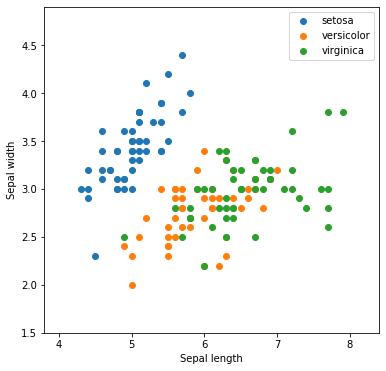

In [15]:
"""
http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

Code source: Gaël Varoquaux
Modified for documentation by Jaques Grobler
License: BSD 3 clause
"""
# Get row locations for each class
setosa_locs = np.where(T == 0)[0].astype(int)
versicolor_locs = np.where(T == 1)[0]
virginica_locs = np.where(T == 2)[0]

# Find min and max x-y coordiantes
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(figsize=(6,6))

# Plot the training points
plt.scatter(X[setosa_locs, 0], X[setosa_locs, 1], label='setosa')
plt.scatter(X[versicolor_locs, 0], X[versicolor_locs, 1], label='versicolor')
plt.scatter(X[virginica_locs, 0], X[virginica_locs, 1], label='virginica')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend() # Plots legend
plt.show()

Interesting! Here we can see that the setosa flower sepal width and length are quite distinguishable from the rest of the classes. It also looks like setosa has a nice linear pattern when it comes to its sepal width and length. Meaning, as the sepal length grows so does the sepal width, typically. On the other hand, the versicolor and virginica flowers sepal features seem to be quite intertwined and more chaotic.

Now, let's see how the petal features relate within and between classes.

### TODO
1. Just like above, plot each class but now with respect to petal length (the 3rd feature) and petal width (the 4th feature).
    - Hint: Reuse the three `plt.scatter()` lines from above but now simply change which columns are being indexed!


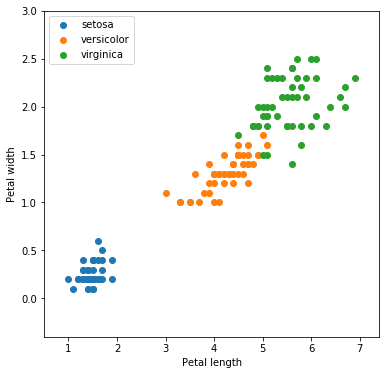

In [16]:
# Get row locations for each class
setosa_locs = np.where(T == 0)[0].astype(int)
versicolor_locs = np.where(T == 1)[0]
virginica_locs = np.where(T == 2)[0]

# Find min and max x-y coordiantes
x_min, x_max = X[:, 2].min() - .5, X[:, 2].max() + .5
y_min, y_max = X[:, 3].min() - .5, X[:, 3].max() + .5

plt.figure(figsize=(6,6))

# TODO (1): Plot petal width and length for each class
plt.scatter(X[setosa_locs, 2], X[setosa_locs, 3], label='setosa')
plt.scatter(X[versicolor_locs, 2], X[versicolor_locs, 3], label='versicolor')
plt.scatter(X[virginica_locs, 2], X[virginica_locs, 3], label='virginica')

plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend()
plt.show()


Take a second to think about what this plot is telling us.

If you’re thinking that all classes seem relatively separable when only looking at the petal features you’re on the right track! There is a slight exception with versicolor and virginica as their sepal features slightly overlap. If you’re also thinking that all the classes show a linear trend you're also on the right track. Each flower petal width seems to grow with petal length.

# Applying Linear Classification

Now it's time to apply newly learned linear classification algorithms. However, be thinking about the following questions before starting, as your apply the algorithms, and as you analyze the results.

- What do we need to do first to the data before running the algorithms?
- How accurate were the linear classifiers on Iris? 
- How can we quantitatively show this measure of accuracy? 

## Data Partitioning
For the first question if you're thinking that we still need to partition our data you're correct! As stated, we still need to split the iris data into a training and testing set, as discussed and practiced last week. Remember, this is to simulate seen (train) and unseen (test) data!

The below code is a modified version the `partition()` function we used last week. Now, the `partition()` function will shuffle our data and its input will be Numpy arrays (last week the input was Pandas DataFrames). 

In [17]:
# now partition the data 

""" partitioning data

    parameters
    -----------
    X        numpy array
             input data to partition
    T        numpy array
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
    return
    -------
    
    Xs       list of numpy arrays
    
    Ts       list of numpy arrays
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    # Checks to make sure ratio sums to 1
    assert(np.sum(ratio) == 1)
    
    # Store the number of data samples 
    N = X.shape[0]

    # change the 1d array to 2d if need
    if len(T.shape) == 1:
        T = T.reshape((N,1))
    
    # Shuffle the data indices 
    idxs = np.random.permutation(N)
        
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
         # Number of rows that corresponds to kth element in ratios
        nrows = int(round(N * r)) 
        
        # print (i, nrows)
        # If we are on the last ratio simply use the remaining data samples
        if k == len(ratio)-1:
            Xs.append(X[idxs[i:], :])
            Ts.append(T[idxs[i:], :])
        else:
            Xs.append(X[idxs[i:i+nrows], :])
            Ts.append(T[idxs[i:i+nrows], :])
        
        i += nrows
    
    return Xs, Ts

### TODO: 
Complete the `partition_data()` function below which will partition data into `Xtrain`, `Xtest`, `Ttrain`, and `Ttest` when called.

1. Split the `data` output from the `partition()` function into `Xtrain`, and `Xtest`
2. Split the `targets` output from the `partition()` function into `Ttrain`, and `Ttest`

In [18]:
def partition_data():
    """Partition data into train and test splits."""
    global Xtrain, Xtest, Ttrain, Ttest
    data, targets = partition(copy(X), copy(T))
    # TODO: Fill in the right had side of the assignments below
    Xtrain, Xtest = data
    # TODO: Fill in the right had side of the assignments below
    Ttrain, Ttest = targets

We can check our implementation of the `partition_data()` function by checking the shapes of our splits below. Make sure you are getting the same output as below!

In [19]:
partition_data()
print("Train data shape: {}".format(Xtrain.shape))
print("Train target shape: {}".format(Ttrain.shape))
print("Test data shape: {}".format(Xtest.shape))
print("Test target shape: {}".format(Ttest.shape))

Train data shape: (120, 4)
Train target shape: (120, 1)
Test data shape: (30, 4)
Test target shape: (30, 1)


**Code note:** You might have noticed the `global` key word here. This is used to declare a local function variable as a global variable. Global variables allow us to use `Xtrain`, `Xtest`, `Ttrain`, and `Ttest` outside of the function and throughout the notebook. Also, anytime we want to reinitialize our data partitions we can simply call `partition_data()` without needing to restart the notebook or rerun this cell!

##  Applying Perceptron Algorithm
The first algorithm we are going to implement is the perceptron algorithm. Recall from our notes that the perceptron algorithm predicts binary classes. The required targets for this algorithm are -1 and 1. This is because the algorithm classifies a data sample as the positive class (target is 1) if the value of the prediction is greater than 0. Likewise, the algorithm classifies a data sample as the negative class (target is -1) if the value of the prediction is less than zero. When the output is exactly zero then it can be unclear to which class the sample belongs to, this is typically a rare event.

We can calculate our prediction by applying the dot product between the current weight vector $w$ and the current data sample vector $x_i$.
\begin{equation}
y = w \cdot x_i
\tag{1}
\end{equation}

We can update our weight vector by taking the element-wise multiplication between the current scalar target $t_i$ and the current data sample vector $x_i$ and then applying our learning-rate $\alpha$ to scale the weight update. Remember that the sign of $t_i$ represents which direction we need to update our weights in!
\begin{equation}
w = w + \alpha t_i x_i
\tag{2}
\end{equation}

### References

- https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975
    - A good blog post to see how all the parts, linear algebra, and calculus, of the perceptron algorithm come together.

### Converting to Binary Classes
Wait a second! How many classes do we have in the iris data? Let's print out the number unique targets below to see how many classes we have. Remember that perceptron only works on binary classification!

In [20]:
np.unique(Ttrain)

array([0, 1, 2])

Oh no! It has three classes. How can we apply binary classifiers when we have three classes? 

To get around this issue we usually apply binary classifiers multiple times in a one-vs-another classification format. This means we pick one class say setosa to be the positive class and then combine the remaining classes into a single class,  the negative class. In essences, we are now trying to determine if a given sample is of the positive class setosa or the negative class, where the negative class is anything but setosa. So, if we wanted to classify all the samples into their exact class we'd have perform the aforementioned idea three times, where each class acts as the postive class and the remaining classes act as the negative class.

For this exercise, we will only focus on classifying our data as setosa or not. Once again, this means that setosa acts as our positive class and the remaining two classes, versicolor and  virginica, combine to give us the negative class.

The next few cells represent the code for setting versicolor and virginica to both have the negative class target of -1.

Using the below code we find all locations for the classes versicolor, and virginica. We do so by simply testing for where the targets in `Ttrain` are above 1. Remember versicolor corresponds to the target 1 and virginica corresponds to the target 2, so we can simply check for where the targets are greater than or equal to 1!

In [21]:
Ttrain >= 1

array([[False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [

Next, we use the previous code to index `Ttrain` only where all the targets are greater than or equal to 1 (this is represented by the 'True' values given in the output above) and then we set these indexed `Ttrain` targets to -1.

In [22]:
Ttrain[Ttrain >= 1] = -1

Now let's take a look at what are class targets are now!

In [23]:
np.unique(Ttrain)

array([-1,  0])

This is good, we have successfully combined our two classes versicolor and virginica into a single negative class. However, recall that if we want to make a prediction our class targets need to be -1 and 1. This is currently not the case. Let's fix this by setting setosa to have a target of 1, corresponding to the positive class.

In [24]:
Ttrain == 0

array([[ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [25]:
Ttrain[Ttrain == 0] = 1

We can validate our method work by checking the number of unique targets in `Ttrain`. As we can see there are now only two targets. One represents our negative class (target equal to -1) which corresponds to versicolor and virginica. The other represents our positive class (target equal to 1) which corresponds to setosa.

In [26]:
np.unique(Ttrain)

array([-1,  1])

### TODO: 
Let's redo what we did above but now converting our code into a function called `convert_targets()`. Repeat the above target reassignment for `Ttrain` and now for `Ttest` as well.

1. Set the versicolor (target 1) and virginica (target 2) classes in `Ttrain` to -1
2. Set the setosa class (target 0) in `Ttrain` to 1
3. Set the versicolor (target 1) and virginica (target 2) classes in `Ttest` to -1
4. Set the setosa class (target 0) in `Ttest` to 1

In [27]:
def convert_targets():
    """ Convert partitioned targets to binary targets formatted for the perceptron algorithm."""
    global Xtrain, Xtest, Ttrain, Ttest
    # TODO (1) 
    Ttrain[Ttrain >= 1] = -1
    # TODO (2)
    Ttrain[Ttrain == 0] = 1
    # TODO (3)
    Ttest[Ttest >= 1] = -1
    # TODO (4)
    Ttest[Ttest == 0] = 1

Run the below code cell to test if the `convert_targets()` function works! You should see two unique targets `[-1, 1]` for both the training and testing sets!

In [28]:
partition_data() # Reinitialize partitions
convert_targets() # Convert partition targets to be binary
print("Training targets: {}".format(np.unique(Ttrain)))
print("Test targets: {}".format(np.unique(Ttest)))

Training targets: [-1  1]
Test targets: [-1  1]


Now we can define an the function `init_data()` which will call `partition_data()` and `convert_targets()` to fully reinitialize our data without needing to restart the notebook or rerun cells! Hopefully this will ensure that we run into less Jupyter errors due to rerunning cells that conflict with one another.

In [29]:
def init_data():
    partition_data()
    convert_targets()

## Perceptron Algorithm Training
Before we start training we still need to add bias to our `Xtrain`. We do this for you in the below code and call this new variable with bias added **`X1train`**.

### TODO
**WARNING: Output of remaining cells below can vary!**

1. Use the weights `w` and `X1train` to make a prediction using the equation below. If this prediction is incorrect then we will need to update our weights in the correct direction.

\begin{equation}
y = w \cdot x_i
\tag{1}
\end{equation}


2. Update weights `w` using the perceptron weight update below using a sample from `X1train` and its corresponding target `Ttrain`

\begin{equation}
w = w + \alpha t_i x_i
\tag{2}
\end{equation}


3. Once our weights `w` have converged or the number of passes over our data, called `epochs`, has been exceeded make the final prediction on our training data using all the `X1train` data and weights `w` . Store the predictions inside `y`.

converged at  8
End of training:  8


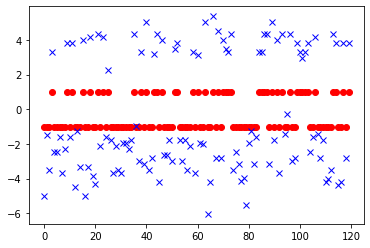

In [30]:
# Reinitialize data partitions and covert targets to binary.
# This ensures that rerunning this cell at any point will work.
init_data()

epcohs = 1000 # Max number passes to make over the data
alpha = 0.1 # Learning-rate

Ntrain = Xtrain.shape[0] # Number of rows in Xtrain
Dtrain = Xtrain.shape[1] # Number of columns in Xtrain

# Adds bias to Xtrain
bias = np.ones((Ntrain, 1))
X1train = np.hstack([bias, Xtrain])

# Randomly initialize weights
w = np.random.random(Dtrain+1) 


for i in range(epcohs):
    converged = True
    for k in range(Ntrain):
        # TODO (1): Make prediction
        y = w @ X1train[k] 
        # Update prediction if prediction does not match target
        if np.sign(y) != np.sign(Ttrain[k]):
            # TODO (2): Update weights
            w += alpha * Ttrain[k] * X1train[k] 
            converged = False
    # If all sings match after full pass over training data then we converged
    if converged:
        print("converged at ", i)
        break

print("End of training: ", i)
# TODO (3): Compute final prediction of converged weights on the training data
y = X1train @ w
plt.plot(Ttrain, 'ro')
plt.plot(y, 'bx')

Here we need to clip our predictions to either 1 or -1 to get our final class predictions. That is, if a prediction is above 0 it is clipped to 1. If a prediction is below zero it is clipped to -1. 

In [31]:
y_clipped = np.sign(y) 

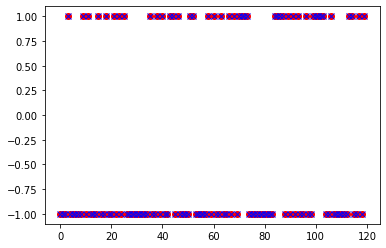

In [32]:
plt.plot(Ttrain, 'ro')
plt.plot(y_clipped, 'bx')

Nice, it looks like the algorithm has learned our training data perfectly and converged within a few passes over our data, i.e. `epochs`!

Well, the figure shows the classification has seemingly worked. We can quantify our results by computing the accuracy as given below. 
$$
  accuracy = \frac{\text{total number of correct classification}} {\text{total number of data samples}} 
$$

In [33]:
train_acc = np.sum(y_clipped.flatten()==Ttrain.flatten()) / Ntrain
print("Train accuracy is: {}%".format(train_acc*100))

Train accuracy is: 100.0%


**Code note:** The `flatten()` method takes a N-dimensional Numpy array and flattens it into one dimension. For instance, if we have a Numpy array with the shape (120, 2) we can flatten it into the shape (240,). Likewise, if we have a Numpy array with the shape (120, 1) we can flatten it into the shape (120,), essentially removing the second dimensions.

Well, that was the training accuracy. What about our test accuracy? How well do our weights `w` preform on unseen data?

In the below code we add the bias column to the`Xtest` and then calculate the predictions by taking the sign of the dot product between `X1test` and `w`.

In [34]:
# Set number of data samples in Xtest
Ntest = Xtest.shape[0]

# Add bias to Xtest
bias = np.ones((Ntest, 1))
X1test = np.hstack([bias, Xtest])

# Compute and clip predictions to get predicted classes
ytest = np.sign(X1test @ w)

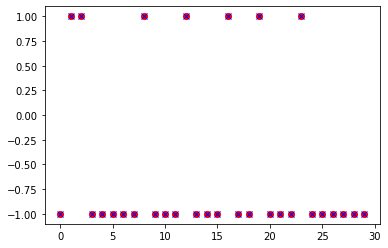

In [35]:
plt.plot(Ttest, 'ro')
plt.plot(ytest, 'bx')

### TODO
Compute the accuracy just like we did for the training set above but now for the test set. 
1. Compute the test accuracy of the clipped test predictions using `ytest`, `Ttest`, and `Ntest`. Store the output into `test_acc`.

In [36]:
# TODO (1)
test_acc = np.sum(ytest.flatten()==Ttest.flatten()) / Ntest
print("Test accuracy is: {}%".format(test_acc*100))

Test accuracy is: 100.0%


Well, our algorithm seems to be preforming very well on the test set! As we observed in the data visualization setosa seemed to be relatively separable from the rest of the classes. So far this observation seems to holding true based on our algorithm's results!

## Pocket Algorithm Training
Now it's time to try the pocket algorithm!

The pocket algorithm preforms a simple change to the original perceptron algorithm, we add memory! With the pocket algorithm we want to store the best weights we have found so far, i.e. we store the weights that give us the most correct predictions. To do so we create a new variable called `w_pocket` which tracks our best weights. Now once the perceptron algorithm is done running we use the best weights, stored in `w_pocket`, to make our final predictions!

Rememeber, if you need a reference for how to program the pocket algorithm look back at the class notes!

### TODO

1. Use the weights `w` and `X1train` to make a prediction. If this prediction is incorrect then we will need to update our weights in the correct direction.
2. Update weights `w` using the perceptron weight update by using a sample from `X1train` and its corresponding target `Ttrain`.
3. Check to see if our weights `w` produce more correct predictions than our stored weights `w_pocket` using the `compare()` function. If our current weights `w` produce more correct predictions then **copy** the weights `w` into `w_pocket`.
    1. We want to feed **all** our data `X1train` and targets `Ttrain` into the function `compare()` to check the predictions for **all** data samples.
4. Once our weights `w` have converged or the number of passes over our data, called `epochs`, has been exceeded make the final prediction on our training data using all the `X1train` data and `w_pocket` weights. Store the predictions inside `y`.


In [38]:
def compare(X, T, w, wp):
    """ Checks number of correct predictions given two weight vectors.
        Args:
            X (np.ndarray): Numpy array of data
            
            T (np.ndarray): Numpy array of targets
            
            w (np.ndarray): Numpy array of weights
            
            wp (np.ndarray): Numpy array of secondary weights
        
        Returns:
            Returns 1 if weights `w` give more correct predictions
            and returns -1 if `wp` give more correct predictions.
    """
    y = np.sign(X @ w)
    yp = np.sign(X @ wp)
    y_correct =  np.sum(y.flatten() == T.flatten())
    yp_correct = np.sum(yp.flatten() == T.flatten())
    return 1 if y_correct >= yp_correct else -1

converged at  1
End of training:  1


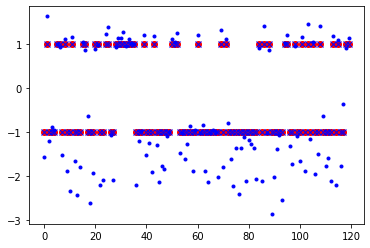

In [39]:
# Reinitialize data partitions and covert targets to binary.
# This ensures that rerunning this cell at any point will work.
init_data()

epcohs = 1000 # Max number passes to make over the data
alpha = 0.1 # Learning-rate

Ntrain = Xtrain.shape[0] # Number of rows in Xtrain
Dtrain = Xtrain.shape[1] # Number of columns in Xtrain

# Adds bias to Xtrain
X1train = np.hstack((np.ones((Ntrain, 1)), Xtrain.reshape((Ntrain, -1))))

# Randomly initialize weights and pocket weights
w = np.random.random(Dtrain+1)
w_pocket = copy(w) # Copy initial weights

for i in range(epcohs):
    converged = True
    for k in range(Ntrain):
        # TODO (1)
        y = w @ X1train[k]
        if np.sign(y) != np.sign(Ttrain[k]):
            # TODO (2)
            w += alpha * Ttrain[k] * X1train[k]
            converged = False
            # TODO (3)
            if compare(X=X1train, T=Ttrain, w=w, wp=w_pocket) > 0:
                w_pocket[:] = w[:]  
                # OR the less memory efficient way
                # w_pocket = copy(w)
    if converged:
        print("converged at ", i)
        break

print("End of training: ", i)
# TODO (4)
y = X1train @ w_pocket
plt.plot(Ttrain, 'ro')
plt.plot(y, 'b.')
plt.plot(np.sign(y), 'bx')

In [52]:
ytrain_pocket = np.sign(y)
acc = np.sum(ytrain_pocket.flatten()==Ttrain.flatten()) / Ntrain
print("Train accuracy is: {}%".format(acc*100))

Train accuracy is: 100.0%


In [53]:
# Set number of data samples in Xtest
Ntest = Xtest.shape[0]

# Add bias to Xtest
bias = np.ones((Ntest, 1))
X1test = np.hstack([bias, Xtest])

# Compute and clip predictions to get predicted classes
ytest_pocket = np.sign(X1test @ w_pocket)

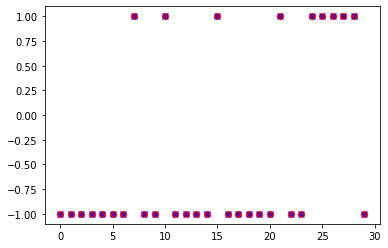

In [54]:
plt.plot(Ttest, 'ro')
plt.plot(ytest_pocket, 'bx')

As might have been expected, our pocket algorithm preforms on par with the basic perceptron algorithm!

### TODO
Compute the accuracy just like we did for the training set above but now for the test set. 
1. Compute the test accuracy of the clipped test predictions using `ytest_pocket`, `Ttest`, and `Ntest`. Store the output into `test_acc_pocket`.

In [55]:
# Compute accuracy
test_acc_pocket = np.sum(ytest_pocket.flatten()==Ttest.flatten()) / Ntest
print("Test accuracy is: {}%".format(test_acc_pocket*100))

Test accuracy is: 100.0%


# Are you done already? 
If you want to practice more, try changing up the positive and negative classes. For example, try having versicolor or virginica act as the positive class while the remaining classes act as the negative class!